In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import Adam

## Step 1: Pre-process and create train set

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5994 images belonging to 200 classes.


## Step 2: pre-process and create test set

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('test/',
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5794 images belonging to 200 classes.


## Step 3: Import the pre- trained model 

In [4]:
from tensorflow.keras.applications.xception import Xception

base_model = Xception(input_shape=(299, 299, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

## Step 4: Add Flattening, hidden and output layers

In [5]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(200, activation='sigmoid')(x)

xception = tf.keras.models.Model(base_model.input, x)
xception.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'], )

In [6]:
xception.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 23,164,656 (88.37 MB)

 Trainable params: 2,303,176 (8.79 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

## Step 5: Train the model

In [7]:
from tensorflow.keras.applications import Xception

# Load the Xception model
xception_model = Xception(weights='imagenet', include_top=True)  # or include_top=False if you want to customize the top layers

# Save the Xception model in SavedModel format
xception_model.save('xception_model')


Epoch 1/20


C:\Users\Admin\.conda\envs\hello\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 1832s 10s/step - accuracy: 0.1355 - loss: 4.3275 - val_accuracy: 0.4153 - val_loss: 2.2872
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2702s 14s/step - accuracy: 0.4404 - loss: 2.0697 - val_accuracy: 0.4957 - val_loss: 1.8520
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1985s 11s/step - accuracy: 0.5674 - loss: 1.5291 - val_accuracy: 0.5533 - val_loss: 1.6368
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1882s 10s/step - accuracy: 0.6443 - loss: 1.2425 - val_accuracy: 0.5841 - val_loss: 1.5006
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1984s 11s/step - accuracy: 0.6852 - loss: 1.0790 - val_accuracy: 0.5853 - val_loss: 1.5186
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2038s 11s/step - accuracy: 0.7194 - loss: 0.9454 - val_accuracy: 0.5872 - val_loss: 1.4951
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1907s 10s/step - accuracy: 0.7529 - loss: 0.8318 - val_accuracy: 0.6108 - val_loss: 1.4304
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2769s 15s/step - accuracy: 0.7714 - loss: 0.7320 - val

## Step 6: Train and Test accuracy, loss plots

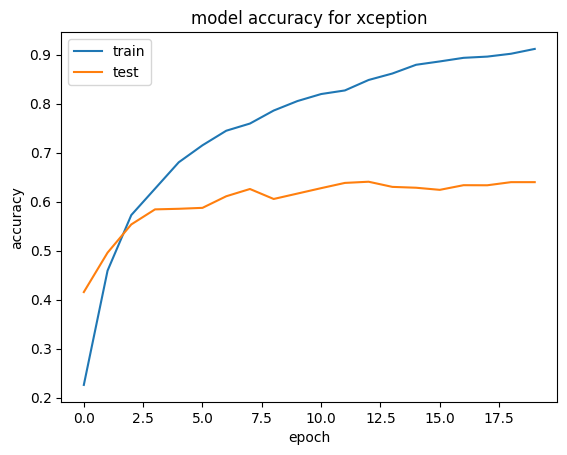

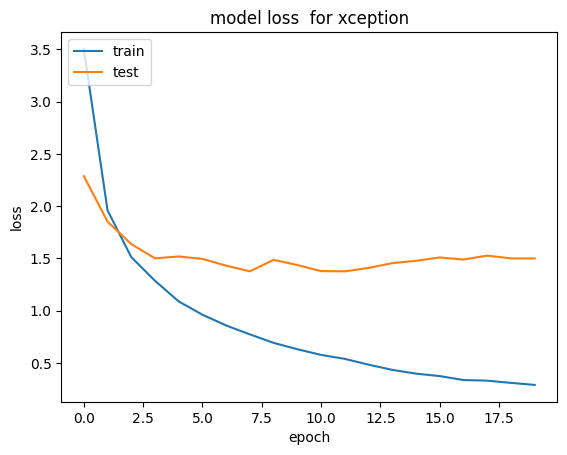

In [9]:
# summarize history for accuracy
plt.plot(xception_hist.history['accuracy'])
plt.plot(xception_hist.history['val_accuracy'])
plt.title('model accuracy for xception')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(xception_hist.history['loss'])
plt.plot(xception_hist.history['val_loss'])
plt.title('model loss  for xception')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import Xception

# Assuming you have already trained or loaded your Xception model
xception_model = Xception(weights='imagenet', include_top=True)

# Convert Xception model to a TensorFlow model
tf_model = tf.keras.models.Model(inputs=xception_model.input, outputs=xception_model.output)

# Save the TensorFlow model in the SavedModel format
tf.saved_model.save(tf_model, 'xception_model')


TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [17]:
import json

# Convert the history.history dict to a JSON file
with open('xception_training_history.json', 'w') as f:
    json.dump(xception_hist.history, f)

In [18]:
from tensorflow.keras.models import load_model

#model = load_model('inception_model.h5')  # For HDF5 format
# or
model2 = load_model('xception_model')  # For SavedModel format

with open('xception_training_history.json', 'r') as f:
    history = json.load(f)


ValueError: File format not supported: filepath=xception_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(xception_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).